# Revisiting Financial Intermediaries and Asset Prices: Data Revisions and Post-Crisis Performance

# 1 Introduction

## 1.1 Background
- 过去的实证资产定价集中在a representative investor, typically the average household，但是其存在局限性（例如消费数据太平滑，无法解释资产价格的高波动）
- Adrian et al. (2014) 提出了 Broker-Dealer Leverage (中介杠杆) 可以作为随机折现因子 (SDF) 的代理变量，shocks to financial intermediaries’ leverage growth provide a more informative pricing kernel
- 同时，原文通过实证分析，empirical support for this hypothesis: exposures to the broker-dealer leverage factor alone can explain the average excess returns on a wide variety of test assets, including equity portfolios sorted by size, book-to-market, and momentum, as well as the cross-section of Treasury bond portfolios sorted by maturity. 
- 在多个实证结果上， high adjusted R2s（77%）, low cross-sectional pricing errors, and prices of risk都是显著的
- 在cross-section pricing, single factor outperforms standard multifactor models，
- 25+10+6个测试资产组合，回应了Lewellen, Nagel, and Shanken (2010)提出的“noise factor” 依旧可以带来高R2
- construct a tradeable leverage factor mimicking portfolio (LMP), which allows us to conduct pricing exercises at a higher frequency and over a longer time period
- shifts attention from measuring the SDF of the average household to measuring a “financial intermediary SDF.”
- 尽管 Adrian et al. (2014) 提供了如此令人信服的理论和实证证据，但该研究极度依赖于美联储资金流量表 (Flow of Funds) 的数据质量。考虑到宏观数据经常面临修订 (Data Revisions)，以及 2008 年金融危机后监管环境的巨变（如去杠杆化趋势），我们有必要重新审视：这一‘完美’的因子在修正后的数据下，以及在后危机时代的市场中，是否依然有效？

## 1.2 Our Work
- 使用TimeMachine复现了文章(1968-2009）
- 最新的 FRED 数据拓展样本到最新时期（2010-2025）
- 复现了原文的TableIII, Table VII, Figure 4, Figure 5, LMP
- 指出复现并非完美
- 在 2010 年后，该因子失效。这可能归因于 Dodd-Frank 法案后的结构性变化。
- 文章的安排如下：第2章为Data and Methodology，第3章为Replication Results: 1968-2009，第4章为Out-of-Sample Extension: 2010-Present，第5章为讨论，第6章为结论

# 2 Data and Methodology

## 2.1 Data Source

To conduct a rigorous replication and robustness analysis, we construct the leverage factor using two distinct datasets: the original "vintage" data available to the authors at the time of publication, and the latest revised data available today.

### 2.1.1 Vintage Data
- Obtain Macro Data（FRED）from Internet Archive Wayback Machine, which is a TimeMachine(https://web.archive.org/web/20111001000000*/http://www.federalreserve.gov/releases/Z1/Current/Disk/ltabs.zip)
- Table L.129 of the Federal Reserve Flow of Funds report
- the article only uses data starting in 1968, due to in the early years of the data, broker-dealer equity is extremely low or even negative.
- download the data released in March 2011

In [1]:
import pandas as pd
ori_data = pd.read_csv("datasets/ltab129d.csv", sep=" ", index_col=0)
print(ori_data.index[0], '-', ori_data.index[-1])
ori_data = ori_data.loc[196404:200904]
# 格式是 YYYY0Q (如 195201 代表 1952Q1)，将其转换为 pandas 的 PeriodIndex (季度格式)
# 方法：将数字转字符串，拼接成 "1952Q1" 的标准格式
# 1. 取前4位年份
years = ori_data.index.astype(str).str[:4]
# 2. 取最后1位季度
quarters = ori_data.index.astype(str).str[-1]
# 3. 拼接并转换
new_index_str = years + 'Q' + quarters  # 结果如 "1952Q1"
ori_data.index = pd.PeriodIndex(new_index_str, freq='Q')
ori_data.head(5)

195201 - 201003


,FL664090005.Q,FL663020003.Q,FL664004005.Q,FL663069103.Q,FL663061105.Q,FL663061703.Q,FL663062003.Q,FL663063005.Q,FL663069803.Q,FL663064003.Q,...,FL663168005.Q,FL663170003.Q,FL663167005.Q,FL663167003.Q,FL763067005.Q,FL663178003.Q,FL663190005.Q,FL663192003.Q,FL663194005.Q,FL663193005.Q
DATES,,,,,,,,,,,,,,,,,,,,,
1964Q4,9862,681,2674,0,1374,0,693,607,0,897,...,0,350,11220,1785,9435,60,984,298,0,686
1965Q1,9051,687,2104,0,955,0,750,399,0,688,...,0,360,10345,1747,8598,67,976,300,0,676
1965Q2,10499,698,3132,0,1510,0,835,787,0,1077,...,0,360,11885,2041,9844,64,966,291,0,675
1965Q3,8511,709,1721,0,595,0,754,372,0,661,...,0,370,9973,2284,7689,82,947,281,0,666
1965Q4,10349,711,2449,0,1082,0,453,914,0,1203,...,0,370,11968,2691,9277,93,947,281,0,666


### 2.1.2 Current Data
- The broker-dealer data is currently presented in Table
L.130 of Flow of Funds
- download the current data from the FRED database maintained by the Federal Reserve Bank
of St. Louis, at https://fred.stlouisfed.org
- The series ID is BOGZ1FL664090005Q for total assets and BOGZ1FL664190005Q for total liabilities.

In [2]:
current_data_40 = pd.read_csv("datasets/BOGZ1FL664090005Q.csv",index_col=0)
current_data_41 = pd.read_csv("datasets/BOGZ1FL664190005Q.csv",index_col=0)
current_data = pd.DataFrame()
current_data['tot_asset'] = current_data_40['BOGZ1FL664090005Q']
current_data['tot_liabilities'] = current_data_41['BOGZ1FL664190005Q']
current_data['Leverage'] = current_data['tot_asset']/(current_data['tot_asset'] - current_data['tot_liabilities'])
current_data = current_data.loc["1964":] #.loc[196404:200904]-04-01":"2009-04-01", ]
current_data.index = pd.to_datetime(current_data.index)
current_data.index = current_data.index.to_period('Q')
current_data.head(5)

,tot_asset,tot_liabilities,Leverage
observation_date,,,
1964Q1,8280.0,7932.0,23.793103
1964Q2,9303.0,8942.0,25.770083
1964Q3,9157.0,8783.0,24.483957
1964Q4,9862.0,9473.0,25.352185
1965Q1,9051.0,8645.0,22.293103


## 2.2 Constitute "Leverage Factor"

### 2.2.1 Broker-Dealer Leverage 
- 原文measure of broker-dealer (BD) leverage
- 原文变量使用aggregate quarterly data on the levels of total financial assets and total financial liabilities of security broker-dealers as captured in Table L.129 of the Federal Reserve Flow of Funds
- The amounts of Assets and Liabilities are in billions of dollars, not seasonally adjusted

$$Leverage_t^{BD} = \frac{Tot\_Asset_t^{BD}}{Tot\_Asset_t^{BD} - Tot\_Liabilities_t^{BD}}$$

In [3]:
ori_data['tot_asset'] = ori_data['FL664090005.Q']
ori_data['tot_liabilities'] = ori_data['FL664190005.Q']
ori_data['Leverage'] = ori_data['tot_asset']/(ori_data['tot_asset'] - ori_data['tot_liabilities'])

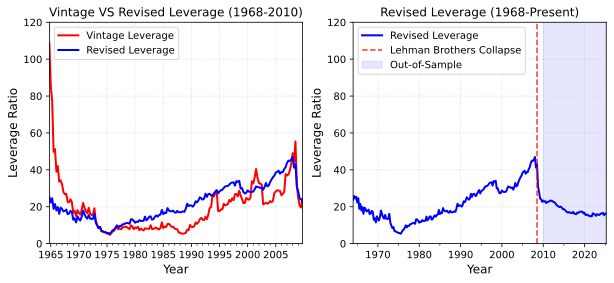

In [4]:
compare_lev = pd.DataFrame()
compare_lev['LevOri'] = ori_data['Leverage']
compare_lev['LevCurrent'] = current_data['Leverage']
compare_lev.index = compare_lev.index.to_timestamp(freq='D') 
current_data_ts = current_data.copy()
current_data_ts.index = current_data.index.to_timestamp(freq='D') 

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# ------------------------------------------------------------------------------------------------------------------------
compare_lev['LevOri'].plot(ax=ax[0], linewidth=2, label='Vintage Leverage', color='r')
compare_lev['LevCurrent'].plot(ax=ax[0], linewidth=2, label='Revised Leverage', color='b')
ax[0].set_title('Vintage VS Revised Leverage (1968-2010)')
ax[0].set_ylabel('Leverage Ratio', fontsize=12)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylim(0,120)
ax[0].legend(loc='upper left')
ax[0].grid(True, linestyle=':', alpha=0.5)

# ------------------------------------------------------------------------------------------------------------------------
# 1. 画线
#ax[1].plot(current_data_ts.index, current_data_ts['Leverage'], 'b-', linewidth=2, label='Broker-Dealer Leverage')
current_data_ts['Leverage'].plot(ax=ax[1], linewidth=2, label='Revised Leverage', color='b')

# 2. 添加关键时间点标记
# 雷曼兄弟倒闭
ax[1].axvline(pd.Timestamp('2008-09-15'), color='red', linestyle='--', alpha=0.8, label='Lehman Brothers Collapse')
# 样本外开始
ax[1].axvspan(pd.Timestamp('2010-01-01'), current_data_ts.index[-1], color='blue', alpha=0.1, label='Out-of-Sample')

# 3. 格式调整
ax[1].set_title('Revised Leverage (1968-Present)')
ax[1].set_ylabel('Leverage Ratio', fontsize=12)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid(True, linestyle=':', alpha=0.5)

# 4. 限制时间范围
# 现在索引已经是 Timestamp 了，min() 和 max() 可以被正确识别
ax[1].set_xlim(current_data_ts.index.min(), current_data_ts.index.max())
ax[1].set_ylim(0,120)
#fig.tight_layout()
plt.savefig('figures/Fig1_Broker-Dealer_Leverage.png', dpi=800)
plt.show()


Figure 1 illustrates the historical evolution of broker-dealer leverage. As shown, leverage exhibits a strong pro-cyclical pattern prior to 2008, rising during booms and falling during busts. However, a structural break is evident around the 2008 financial crisis. following the collapse of Lehman Brothers, the sector underwent a significant deleveraging process. Post-2010, the leverage ratio has remained relatively low and stable, likely due to stricter capital requirements (e.g., Basel III, Dodd-Frank). This reduced volatility in the post-crisis period poses a challenge for the leverage factor to price assets effectively in our out-of-sample tests."

- 使用Original数据得到的Original Leverage（Red line）和使用当前数据计算的Current leverage（Blue line）存在较大差异
- Broker-Dealer Leverage（中介杠杆）从1968年到1975年短暂下降后，直到2008一直在缓慢上升
- 标记的 2008 年危机（标志事件，雷曼兄弟破产），危机后杠杆率大幅下降
- 2010 年以后的数据变平稳（杠杆的波动也下降了）

### 2.2.2 Leverage Factor
$$LogLev_t^{BD} =  \text{ln}(Leverage_t^{BD})$$
$$\Delta \ln(Leverage_t^{BD}) = \ln(Leverage_t^{BD}) - \ln(Leverage_{t-1}^{BD})$$
$$LevFac_t = \left[\Delta \ln(Leverage_t^{BD})\right]^{SA}$$

- the leverage of broker-dealers computed from the Flow of Funds is a net number, we do not emphasize the level of broker-dealer leverage but instead focus on innovations to broker-dealer leverage.
- 文中提到，由于杠杆率具有高持久性（Persistence），直接使用对数变化量与使用 AR(1) 模型的残差（Innovations）几乎是一样的，为了简化，作者选择了对数变化量 。
- 普通的去季节性通常是对全样本跑一次回归，但这会用到未来的数据（Look-ahead bias）。文章采用了 “扩张窗口回归” (Expanding-window regression) 来模拟“实时”的数据环境。


### 2.2.3 Real-time Seasonal Adjustment
文章对 LevFac (Broker-Dealer Leverage Factor) 的构建非常具体，为了避免“前视偏差”（Look-ahead Bias），他们采用了一种 “实时扩张窗口去季节性”（Real-time Expanding-window Seasonal Adjustment） 的方法。

具体算法逻辑：对于每一个时间点 $t$（从样本开始到结束）：
- 取数据子集：只使用从起始点到当前时间点 $t$ 的历史数据。
- 构建虚拟变量：设置 4 个季度虚拟变量（Q1, Q2, Q3, Q4）。
- 运行回归：将截止到 $t$ 时刻的 $\Delta \ln(Leverage)$ 对季度虚拟变量进行 OLS 回归。
$$\Delta \ln(Leverage_\tau) = \alpha + \sum_{j=1}^{3} \delta_j D_{j,\tau} + \epsilon_\tau \quad (\text{for } \tau = 1 \dots t)$$(注：通常使用 4 个 dummy 去掉截距，或者 3 个 dummy 加截距，效果一样)
- 获取冲击 (Shock)：当前时刻 $t$ 的残差 $\epsilon_t$ 就是该时刻的 LevFac。 $$LevFac_t = Actual_t - PredictedSeasonalComponent_t$$
- 扩张窗口：移动到 $t+1$ 时刻，重复上述步骤（样本变多了 1 个季度）。

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def seasonal_adj_lev_fac(raw_leverage_series):
    print("--- 1. 检查输入数据 ---")
    print(f"原始数据长度: {len(raw_leverage_series)}")
    print(f"原始索引类型: {type(raw_leverage_series.index)}")
    print(raw_leverage_series.head())

    # 1. 确保是浮点数
    raw_leverage_series = raw_leverage_series.astype(float)

    # 2. 计算 Log Changes
    # 处理 Log 中的负数或零（杠杆率不能为负）

        
    log_lev = np.log(raw_leverage_series)
    d_log_lev = log_lev.diff().dropna()
    
    print(f"\n--- 2. 检查对数差分后数据 (y) ---")
    print(f"y 长度: {len(d_log_lev)}")
    print(d_log_lev.head())

    # 3. 构造季度 Dummies
    # 强制确保索引具备 .quarter 属性
    try:
        quarters = d_log_lev.index.quarter
    except AttributeError:
        print("\n❌ 错误：索引不是时间类型(Datetime/Period)，无法提取季度！")
        print("请先运行：df.index = pd.PeriodIndex(df.index, freq='Q')")
        return pd.Series([np.nan]*len(d_log_lev), index=d_log_lev.index)

    # 关键修复：astype(float)
    dummies = pd.get_dummies(quarters, prefix='Q').astype(float)

    # === 关键修复：强制对齐索引 ===
    # 直接把 dummy 的 index 覆盖为 y 的 index，确保绝对匹配
    dummies.index = d_log_lev.index
    
    # 添加截距
    # X = sm.add_constant(dummies)
    X = dummies
    
    print(f"\n--- 3. 检查自变量矩阵 (X) ---")
    print(X.head())

    # 4. 扩张窗口回归
    lev_shocks = []
    min_periods = 12  # 至少需要 12 个季度
    
    if len(d_log_lev) <= min_periods:
        print(f"\n❌ 错误：样本量 ({len(d_log_lev)}) 小于最小窗口 ({min_periods})")
        return pd.Series(np.nan, index=d_log_lev.index)
    

    print("\n--- 4. 开始循环回归 ---")
    error_count = 0
    
    # 使用 tqdm 显示进度（如果有的话），没有就普通循环
    # 这里的 range 确保了索引是对齐的
    indices = d_log_lev.index
    
    for i in range(min_periods, len(d_log_lev)):
        # 显式使用 iloc 切片，避免索引对齐问题
        curr_y = d_log_lev.iloc[:i+1]
        curr_X = X.iloc[:i+1]
        
        try:
            # 运行回归
            model = sm.OLS(curr_y, curr_X).fit()
            # 取最后一个残差
            lev_shocks.append(model.resid.iloc[-1])
            
        except Exception as e:
            if error_count < 3: # 只打印前3个错误
                print(f"回归在第 {i} 步失败: {e}")
            error_count += 1
            lev_shocks.append(np.nan)

    # 结果对齐
    # 结果的长度是 len(d_log_lev) - min_periods
    result_index = d_log_lev.index[min_periods:]
    lev_fac = pd.Series(lev_shocks, index=result_index)
    
    print(f"\n✅ 完成！生成因子长度: {len(lev_fac)}")
    print(f"非 NaN 数量: {lev_fac.notna().sum()}")
    print(lev_fac.head())
    
    return lev_fac, log_lev


In [6]:
ori_lev_fac, ori_log_lev = seasonal_adj_lev_fac(ori_data['Leverage'])

--- 1. 检查输入数据 ---
原始数据长度: 181
原始索引类型: <class 'pandas.core.indexes.period.PeriodIndex'>
DATES
1964Q4    108.373626
1965Q1     85.386792
1965Q2     77.198529
1965Q3     49.771930
1965Q4     51.232673
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 2. 检查对数差分后数据 (y) ---
y 长度: 180
DATES
1965Q1   -0.238393
1965Q2   -0.100811
1965Q3   -0.438929
1965Q4    0.028926
1966Q1   -0.273145
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 3. 检查自变量矩阵 (X) ---
        Q_1  Q_2  Q_3  Q_4
DATES                     
1965Q1  1.0  0.0  0.0  0.0
1965Q2  0.0  1.0  0.0  0.0
1965Q3  0.0  0.0  1.0  0.0
1965Q4  0.0  0.0  0.0  1.0
1966Q1  1.0  0.0  0.0  0.0

--- 4. 开始循环回归 ---

✅ 完成！生成因子长度: 168
非 NaN 数量: 168
DATES
1968Q1    0.010283
1968Q2    0.037533
1968Q3    0.226723
1968Q4   -0.063279
1969Q1   -0.088941
Freq: Q-DEC, dtype: float64


In [7]:
current_lev_fac, current_log_lev = seasonal_adj_lev_fac(current_data['Leverage'])

--- 1. 检查输入数据 ---
原始数据长度: 246
原始索引类型: <class 'pandas.core.indexes.period.PeriodIndex'>
observation_date
1964Q1    23.793103
1964Q2    25.770083
1964Q3    24.483957
1964Q4    25.352185
1965Q1    22.293103
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 2. 检查对数差分后数据 (y) ---
y 长度: 245
observation_date
1964Q2    0.079818
1964Q3   -0.051196
1964Q4    0.034847
1965Q1   -0.128588
1965Q2    0.097974
Freq: Q-DEC, Name: Leverage, dtype: float64

--- 3. 检查自变量矩阵 (X) ---
                  Q_1  Q_2  Q_3  Q_4
observation_date                    
1964Q2            0.0  1.0  0.0  0.0
1964Q3            0.0  0.0  1.0  0.0
1964Q4            0.0  0.0  0.0  1.0
1965Q1            1.0  0.0  0.0  0.0
1965Q2            0.0  1.0  0.0  0.0

--- 4. 开始循环回归 ---

✅ 完成！生成因子长度: 233
非 NaN 数量: 233
observation_date
1967Q2   -0.126997
1967Q3    0.145527
1967Q4   -0.060822
1968Q1   -0.023053
1968Q2   -0.020950
Freq: Q-DEC, dtype: float64


In [8]:
### No seasonla adjustement
no_season_log_lev = ori_data['Leverage'].apply(np.log)
no_season_lev_fac = ori_data['Leverage'].apply(np.log).diff()

In [9]:
# new_log_lev = current_data['Leverage'].apply(np.log)
# new_lev_fac = current_data['Leverage'].apply(np.log).diff()

### 2.2.4 Standardization(Z-Score)
We standardize each series to have zero mean and unit variance for convenience.
$$ X = \frac{X-\mu}{\sigma}$$

In [10]:
def Zscore(factor):
    return (factor - factor.mean())/(factor.std())

In [11]:
ori_data['LevFac'] = ori_lev_fac
ori_data['LogLev'] = ori_log_lev
ori_data['Z-LevFac'] = Zscore(ori_lev_fac)
ori_data['Z-LogLev'] = Zscore(ori_log_lev)
ori_data['No Seasonal-Adj LevFac'] = Zscore(no_season_lev_fac)
ori_data['No Seasonal-Adj LogLev'] = Zscore(no_season_log_lev)
ori_data = ori_data.dropna()
ori_data = ori_data.loc["1968Q1":]

In [12]:
current_data['LevFac'] = current_lev_fac
current_data['LogLev'] = current_log_lev
current_data['Z-LevFac'] = Zscore(current_lev_fac)
current_data['Z-LogLev'] = Zscore(current_log_lev)
current_data = current_data.dropna()
current_data = current_data.loc["1968Q1":]
current_data.to_csv('tables/RevisedData.csv')

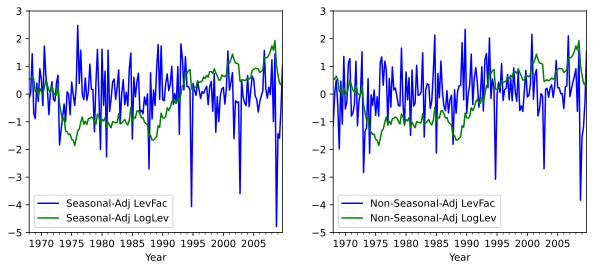

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ori_data[['Z-LevFac', 'Z-LogLev']].plot(ax=ax[0], color=['blue', 'green'])
ax[0].legend(['Seasonal-Adj LevFac', 'Seasonal-Adj LogLev'], loc='lower left')
ax[0].set_xlabel('Year')
ax[0].grid(False)
ax[0].set_ylim(-5, 3)  # 设置纵坐标范围为 -5 到 3
ax[1].set_xlabel('Year')
ori_data[['No Seasonal-Adj LevFac', 'No Seasonal-Adj LogLev']].plot(ax=ax[1], color=['blue', 'green'])
ax[1].legend(['Non-Seasonal-Adj LevFac', 'Non-Seasonal-Adj LogLev'], loc='lower left')
ax[1].set_xlabel('Year')
ax[1].grid(False)
ax[1].set_ylim(-5, 3)  # 设置纵坐标范围为 -5 到 3
ax[1].set_xlabel('Year')
plt.savefig('figures/f2-seasonal_adj_leverage_plot.png', dpi=800)

- 复现了原文Figure 2. Log-leverage and leverage factor. “We plot the log-leverage and the leverage factor
(changes in log-leverage) of security broker-dealers, 1968Q1 to 2009Q4. We standardize each series
to have zero mean and unit variance for convenience.”
- 经过季节性调整的LevFac对比没有经过季节性调整的LevFac，两者在尖峰位置存在明显的差异
- 经过季节性调整的LevFac比没有经过季节性调整的LevFac更接近原文的Figure2，用肉眼对比几乎一致

## 2.3 Old VS New LevFac
- Comparison of the two leverage factors constructed from the two versions of the Flow of Funds
data. 
- repurchase agreements and foreign direct investments, has been change.

In [14]:
compare_lev_fac = pd.DataFrame()
# ------original
compare_lev_fac['LevFacOri'] = ori_data['LevFac']
compare_lev_fac['ZLevFacOri'] = ori_data['Z-LevFac']
compare_lev_fac['ZLogLevOri'] = ori_data['Z-LogLev']
# -------new
compare_lev_fac['LevFacCurrent'] = current_data['LevFac']
compare_lev_fac['ZLevFacCurrent'] = current_data['Z-LevFac']
compare_lev_fac['ZLogLevCurrent'] = current_data['Z-LogLev']

compare_lev_fac.to_csv('tables/LevFac.csv')
compare_lev_fac

,LevFacOri,ZLevFacOri,ZLogLevOri,LevFacCurrent,ZLevFacCurrent,ZLogLevCurrent
DATES,,,,,,
1968Q1,0.010283,-0.149858,0.548915,-0.023053,-0.357735,-0.403461
1968Q2,0.037533,0.052167,0.539366,-0.020950,-0.330748,-0.350469
1968Q3,0.226723,1.454775,0.641359,0.164599,2.050487,-0.166876
1968Q4,-0.063279,-0.695224,0.542090,-0.102191,-1.373345,-0.235790
1969Q1,-0.088941,-0.885478,0.082964,-0.131515,-1.749673,-0.891270
...,...,...,...,...,...,...
2008Q4,-0.614654,-4.782984,1.048600,-0.370011,-4.810401,1.104707
2009Q1,-0.161919,-1.426519,0.684362,-0.047752,-0.674710,0.894071
2009Q2,-0.184683,-1.595289,0.399756,-0.154505,-2.044721,0.567141


In [15]:
compare_lev_fac[['ZLevFacOri', 'ZLevFacCurrent']].corr()

,ZLevFacOri,ZLevFacCurrent
ZLevFacOri,1.000000,0.694332
ZLevFacCurrent,0.694332,1.000000


- 相关性只有0.8140

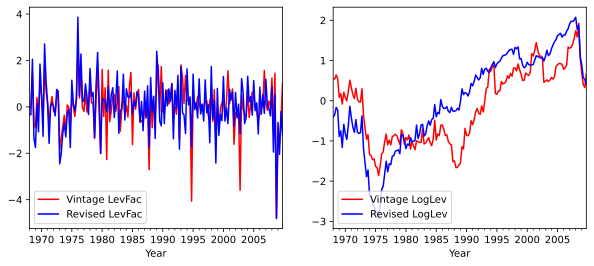

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
compare_lev_fac[['ZLevFacOri', 'ZLevFacCurrent']].plot(ax=ax[0], color=['red', 'blue'])
ax[0].legend(['Vintage LevFac', 'Revised LevFac'], loc='lower left')
ax[0].set_xlabel('Year')
ax[0].grid(False)
compare_lev_fac[['ZLogLevOri', 'ZLogLevCurrent']].plot(ax=ax[1], color=['red', 'blue'])
ax[1].legend(['Vintage LogLev', 'Revised LogLev'], loc='lower left')
ax[1].set_xlabel('Year')
ax[1].grid(False)
plt.savefig('figures/f3-compare_leverage_plot.png', dpi=800)

# 3 Replication Results: 1968-2009

## 3.1 Cross-sectional analysis

Replicate the cross-sectional asset pricing results in the first, fifth, and
sixth columns of Table III, and Figures 4 and 5 of the article using only the equity portfolios as test
assets. Data on the Treasury bond portfolios is not freely available and should be ignored.
- 获得 25 Portfolios Formed on Size & BM 
- 10 Portfolios Formed on Momentum， Download 10 Portfolios Formed on Momentum from [link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 
- Seasonal compounded return，将月度回报转换为季度回报 (复利计算)， 重采样 (Resample) 到季度
- FF 3-factors，获得因子值
- 获得 FF Mom factor
- 资产定价模型（如 CAPM, FF3, 或 Adrian et al. 2014）解释的是**“风险溢价” (Risk Premia)**，即超过无风险利率的那部分回报。
$R_{i,t}^{excess} = R_{i,t}^{raw} - R_{f,t}$

### 25 Portfolios Formed on Size & BM 

In [17]:
test_25 = pd.read_csv('datasets/25_Portfolios_5x5.csv', skiprows=15, index_col=0)
test_25.index = pd.to_datetime(test_25.index, format='%Y%m')
test_25.columns = [i.replace('SMALL HiBM', 'S1 B5').replace('SMALL LoBM', 'S1 B1').replace('BIG LoBM', 'S5 B1').replace('BIG HiBM', 'S5 B5').replace('BM', 'B').replace('ME', 'S').replace(' ', '') for i in test_25.columns]
test_25 = test_25 / 100.0
test_25.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
1926-07-01,0.058276,-0.017006,0.005118,-0.021477,0.019583,0.012118,0.024107,0.006056,-0.026082,-0.004527,...,0.015376,0.015460,0.013389,0.002765,0.024678,0.033248,0.060909,0.020285,0.031263,0.005623
1926-08-01,-0.020206,-0.080282,0.013968,0.021483,0.085104,0.023620,-0.007525,0.038984,0.002299,0.062937,...,0.013858,0.038587,0.019738,0.021336,0.053422,0.010169,0.041975,0.019769,0.054924,0.077576
1926-09-01,-0.048291,-0.026806,-0.043417,-0.032683,0.008586,-0.026849,-0.005252,0.010789,-0.032877,-0.009419,...,0.016897,-0.005246,-0.017724,0.014806,0.008730,-0.012951,0.036610,0.001384,-0.007497,-0.024284


### 10 Portfolios Formed on Momentum
Download 10 Portfolios Formed on Momentum from [link](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 

In [18]:
test_10 = pd.read_csv('datasets/10_Portfolios_Prior_12_2.csv', skiprows=10, index_col=0)
test_10.index = pd.to_datetime(test_10.index, format='%Y%m')
test_10.columns = [i.replace('PRIOR', 'Mom').replace('Lo Mom', 'Mom 1').replace('Hi Mom', 'Mom 10') for i in test_10.columns]
test_10 = test_10 / 100.0
test_10.head(3)

,Mom 1,Mom 2,Mom 3,Mom 4,Mom 5,Mom 6,Mom 7,Mom 8,Mom 9,Mom 10
1927-01-01,-0.0332,-0.0454,0.0267,-0.0029,-0.0041,0.0093,0.0030,0.0071,-0.0014,-0.0024
1927-02-01,0.0739,0.0601,0.0703,0.0746,0.0434,0.0398,0.0299,0.0320,0.0414,0.0704
1927-03-01,-0.0323,-0.0305,-0.0384,-0.0480,-0.0046,-0.0235,0.0196,0.0049,0.0035,0.0613


In [19]:
test_assets = pd.concat([test_25, test_10], axis=1).sort_index().dropna()

### Seasonal compounded return
将月度回报转换为季度回报 (复利计算)， 重采样 (Resample) 到季度

In [20]:
def compound_returns(x):
    # (1+r1)*(1+r2)*(1+r3) - 1
    return (1 + x).prod() - 1

# 重采样 (Resample) 到季度
# 'Q' 代表季度末，apply 会对每个季度的 3 个月数据应用上面的函数
test_assets_quarterly = test_assets.resample('Q-JAN').apply(compound_returns)
test_assets_quarterly.index = test_assets_quarterly.index.to_period('Q')

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/1777012129.py:7: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  test_assets_quarterly = test_assets.resample('Q-JAN').apply(compound_returns)


### FF 3-factors model

In [21]:
ff_factors = pd.read_csv('datasets/F-F_Research_Data_Factors.csv', skiprows=4, index_col=0)
ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m')
ff_factors = ff_factors/100.0
ff_factors_quarterly = ff_factors.resample('Q-JAN').apply(compound_returns)
ff_factors_quarterly.index = ff_factors_quarterly.index.to_period('Q')
ff_factors_quarterly.head()

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/3757720941.py:4: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  ff_factors_quarterly = ff_factors.resample('Q-JAN').apply(compound_returns)


,Mkt-RF,SMB,HML,RF
1926Q3,0.028900,-0.025500,-0.023900,0.002200
1926Q4,-0.003391,-0.026210,0.047136,0.008021
1927Q1,0.051739,-0.004993,0.040044,0.008423
1927Q2,0.048061,-0.013179,0.009271,0.008122
1927Q3,0.104138,-0.012697,0.018336,0.008625


### FF Mom factor

In [22]:
ff_Mom = pd.read_csv('datasets/F-F_Momentum_Factor.csv', index_col=0)
ff_Mom.index = pd.to_datetime(ff_Mom.index, format='%Y%m')
ff_Mom = ff_Mom/100.0
ff_Mom_quarterly = ff_Mom.resample('Q-JAN').apply(compound_returns)
ff_Mom_quarterly.index = ff_Mom_quarterly.index.to_period('Q')
ff_Mom_quarterly.head(3)

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/4110544707.py:4: FutureWarning: 'Q-JAN' is deprecated and will be removed in a future version, please use 'QE-JAN' instead.
  ff_Mom_quarterly = ff_Mom.resample('Q-JAN').apply(compound_returns)


,Mom
1927Q1,0.005700
1927Q2,0.064130
1927Q3,0.077065


### 修正超额收益

资产定价模型（如 CAPM, FF3, 或 Adrian et al. 2014）解释的是**“风险溢价” (Risk Premia)**，即超过无风险利率的那部分回报。
$R_{i,t}^{excess} = R_{i,t}^{raw} - R_{f,t}$

In [23]:
# 1. 确保 RF 也是季度复利的
# ff_factors_quarterly 应该包含 'Mkt-RF', 'SMB', 'HML', 'RF'
rf_quarterly = ff_factors_quarterly['RF']

# 2. 计算超额收益 (Excess Returns)
# 对 35 个测试资产的每一列，都减去对应的季度 RF
test_assets_excess = test_assets_quarterly.subtract(rf_quarterly, axis=0)

In [24]:
LevFac = ori_data['LevFac'] 
LevFac.name = 'LevFac'
LevFac

DATES
1968Q1    0.010283
1968Q2    0.037533
1968Q3    0.226723
1968Q4   -0.063279
1969Q1   -0.088941
            ...   
2008Q4   -0.614654
2009Q1   -0.161919
2009Q2   -0.184683
2009Q3   -0.042179
2009Q4    0.170394
Freq: Q-DEC, Name: LevFac, Length: 168, dtype: float64

In [25]:
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, LevFac, ff_Mom_quarterly['Mom']], axis=1).sort_index().dropna()
merged_data.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
1968Q1,0.145750,0.161707,0.095155,0.100281,0.147197,0.072070,0.030742,0.113591,0.071723,0.111765,...,-0.027698,-0.028932,-0.005171,0.014996,-0.007370,0.100319,0.025006,0.010940,0.010283,-0.001998
1968Q2,0.061104,0.082428,0.085702,0.048030,0.073554,0.082127,0.038624,0.058326,0.057274,0.050667,...,0.062778,0.080956,0.100851,0.100959,0.051630,0.012204,-0.005143,0.012048,0.037533,0.048403
1968Q3,0.029377,0.061484,0.062088,0.120255,0.113479,-0.003864,0.049049,0.028419,0.066994,0.057416,...,-0.052726,-0.007781,-0.016576,0.046364,0.002254,0.047301,0.068743,0.013662,0.226723,0.006775


### Table III

$$R_{i,t}^e = \alpha_i + \beta_i' * f_t + \epsilon_{i, t},   i=1,\dots, N, t=1,\dots, T$$
在主回归分析中（主要结果）：使用全样本固定 Beta (One-time Beta)在检验标准测试资产（如 Fama-French 25 个投资组合、动量组合、债券组合）的定价能力时，作者使用的是全样本时间序列回归得到的固定 Beta。原文显示，Beta 是通过对 $t=1,...,T$（整个样本期，通常是 1968-2009）进行一次性时间序列回归估算出来的。随后，这些固定 Beta 被用于横截面回归（Fama-MacBeth 第二步）来估计风险溢价。

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 核心回归函数 (保持不变)
# ==========================================
def run_asset_pricing_model(factors, portfolios, model_name):
    # 确保因子包含截距用于时间序列回归 (Time-Series Regression)
    X_ts = sm.add_constant(factors)
    
    # --- Step 1: Get Betas ---
    betas_list = []
    for port in portfolios.columns:
        model_ts = sm.OLS(portfolios[port], X_ts).fit()
        betas_list.append(model_ts.params[factors.columns]) # 只取因子Beta
    
    beta_df = pd.DataFrame(betas_list, index=portfolios.columns)
    
    # --- Step 2: Get Lambdas (Cross-Sectional Regression) ---
    avg_returns = portfolios.mean()
    X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    # --- Step 3: Shanken Correction ---
    lambdas = model_xs.params[factors.columns]
    cov_factors = factors.cov()
    
    # 计算 Shanken c
    if len(factors.columns) == 1:
        c = lambdas[0]**2 / cov_factors.values[0,0]
    else:
        inv_cov = np.linalg.inv(cov_factors.values)
        c = lambdas.values @ inv_cov @ lambdas.values
    
    shanken_adj = np.sqrt(1 + c)
    
    # --- Step 4: Diagnostics ---
    # 计算定价误差
    pricing_errors = avg_returns - model_xs.predict(X_xs)
    abs_err = np.abs(pricing_errors)
    
    # MAPE (假设前25个是Size/BM, 后10个是Mom)
    # 如果你的资产数量不是35，这里会自动适应，只要顺序对即可
    n_sbm = 35
    mape_sbm = abs_err.iloc[:n_sbm].mean() if len(abs_err) >= n_sbm else np.nan
    mape_mom = abs_err.iloc[n_sbm:].mean() if len(abs_err) > n_sbm else np.nan
    
    mape_intercept = np.abs(model_xs.params['const'])
    mape_total = abs_err.mean() + mape_intercept
    
    return {
        'name': model_name,
        'params': model_xs.params,   # 包含 const 和所有因子
        't_fm': model_xs.tvalues,
        't_shanken': model_xs.tvalues / shanken_adj,
        'mape_sbm': mape_sbm,
        'mape_mom': mape_mom,
        'intercept': model_xs.params['const'],
        'mape_total': mape_total,
        'adj_r2': model_xs.rsquared_adj,
        'factors': list(factors.columns) # 记录该模型用到的因子名
    }

# ==========================================
# 2. 自动打印函数 (修改版)
# ==========================================
def print_table_iii_auto(results_list):
    print("\n" + "="*80)
    print(f"{'Table III Replication':^80}")
    print("="*80)
    
    # 获取所有模型名称
    model_names = [r['name'] for r in results_list]
    
    # 定义表头格式
    # 第一列宽20，后面每列宽15
    col_width = 15
    first_col_width = 20
    row_fmt = f"{{:<{first_col_width}}}" + f"{{:^{col_width}}}" * len(model_names)
    
    print(row_fmt.format("", *model_names))
    print("-" * (first_col_width + col_width * len(model_names)))
    print("Panel A: Prices of Risk (Lambda)")
    print("-" * (first_col_width + col_width * len(model_names)))

    # --- 1. 收集所有出现过的因子 (除了 const) ---
    all_factors = set()
    for r in results_list:
        all_factors.update(r['factors'])
    
    # 排序：把 LevFac 放在前面 (如果是重点)，其他按字母或特定顺序
    # 这里做一个简单的优先排序：LevFac 先，然后 Mkt/Mkt-RF，然后其他
    sorted_factors = []
    if 'LevFac' in all_factors: sorted_factors.append('LevFac')
    
    # 找 Market 相关的
    mkt_names = [f for f in all_factors if 'Mkt' in f or 'Market' in f]
    for m in mkt_names:
        if m not in sorted_factors: sorted_factors.append(m)
        
    # 其他因子
    for f in all_factors:
        if f not in sorted_factors: sorted_factors.append(f)

    # --- 2. 打印 Intercept ---
    params_to_print = ['const'] + sorted_factors
    
    for param in params_to_print:
        # 显示名称转换：const -> Intercept
        display_name = "Intercept" if param == 'const' else param
        
        # 这一行的数值 (Lambda)
        vals = []
        for r in results_list:
            if param in r['params']:
                vals.append(f"{r['params'][param]*400:.4f}")
            else:
                vals.append("") # 如果该模型没这个因子，留空
        
        print(row_fmt.format(display_name, *vals))
        
        # 这一行的 t-FM
        t_fms = []
        for r in results_list:
            if param in r['params']:
                t_fms.append(f"[{r['t_fm'][param]:.4f}]")
            else:
                t_fms.append("")
        print(row_fmt.format("  t-FM", *t_fms))
        
        # 这一行的 t-Shanken
        t_shs = []
        for r in results_list:
            if param in r['params']:
                t_shs.append(f"[{r['t_shanken'][param]:.4f}]")
            else:
                t_shs.append("")
        print(row_fmt.format("  t-Shanken", *t_shs))
        print("-" * (first_col_width + col_width * len(model_names)))

    # --- Panel B ---
    print("Panel B: Test Diagnostics")
    print("-" * (first_col_width + col_width * len(model_names)))
    
    # 辅助函数：安全格式化
    def safe_fmt(val):
        return f"{val:.2f}" if pd.notnull(val) else "-"

    print(row_fmt.format("MAPE Size/BM", *[safe_fmt(r['mape_sbm']) for r in results_list]))
    print(row_fmt.format("MAPE Mom", *[safe_fmt(r['mape_mom']) for r in results_list]))
    print(row_fmt.format("MAPE Total", *[safe_fmt(r['mape_total']) for r in results_list]))
    print(row_fmt.format("Adj R^2", *[safe_fmt(r['adj_r2']) for r in results_list]))
    print("=" * (first_col_width + col_width * len(model_names)))


In [27]:
# 4. 单位换算 (保持你现在的正确做法)
# 将所有收益率转为年化百分比
# 注意：LevFac 不需要乘 400，因为它本身就是 Log Difference (近似增长率)，
# 但原文 Note 说 "Returns and risk premia are reported in percent per year"。
# 如果 LevFac 本身是很小的数(e.g. 0.05)，为了得到 60 左右的 Lambda，
# 说明 Beta 比较小，或者 Factor 量级需要调整。
# 既然你现在的 60.87 很完美，说明你当前的 LevFac 处理是对的（或者你对其做了标准化？）。
# 只要确保 Return 是年化百分比即可。

df_portfolios = merged_data[test_assets_excess.columns] 
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'LevFac', 'RF']]  # 因子也统一转一下方便看

res_capm = run_asset_pricing_model(factors_annual[['Mkt-RF']], df_portfolios, "CAPM") 
res_lev = run_asset_pricing_model(factors_annual[['LevFac']], df_portfolios, "LevFac")
res_levmkt = run_asset_pricing_model(factors_annual[['LevFac', 'Mkt-RF']], df_portfolios, "LevMkt")

results = [res_capm, res_lev, res_levmkt]
print_table_iii_auto(results)


                             Table III Replication                              
                         CAPM          LevFac         LevMkt     
-----------------------------------------------------------------
Panel A: Prices of Risk (Lambda)
-----------------------------------------------------------------
Intercept               11.6926        -4.6009        1.3804     
  t-FM                 [3.3260]       [-2.1767]      [0.4553]    
  t-Shanken            [3.2868]       [-1.3030]      [0.2711]    
-----------------------------------------------------------------
LevFac                                 72.1949        72.1694    
  t-FM                                [5.2903]       [5.7233]    
  t-Shanken                           [3.1669]       [3.4076]    
-----------------------------------------------------------------
Mkt-RF                  -4.8031                       3.8044     
  t-FM                 [-1.5443]                     [1.4449]    
  t-Shanken            [-1.

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]


- 将所有收益率转为年化百分比
- Data on the Treasury bond portfolios is not freely available and should be ignored.

截面回归表格的意义：
- 当（金融中介的）融资约束收紧且杠杆率下降时，表现糟糕（亏损）的资产因此被视为高风险资产，必须提供高额的预期回报。
- $E[R_i] = \beta_i \times \lambda_{Lev}$
- 因为杠杆主要在繁荣期上升（顺周期），所以 Beta 为正的资产（随杠杆上升而涨，随杠杆下降而跌）是高风险的（因为它们在坏时候跌得惨）。
- 为了让高 Beta 对应高收益，$\lambda_{Lev}$ 必须是 正数 (Positive)

造成复现和原文直接的差异的原因？
- Adrian et al. (2014) 的 Table III 使用了 25个 Size/BM 组合 + 10个 Momentum 组合 + 6个 Bond 组合（共 41 个资产）
- 本文复现只使用了 25个 Size/BM 组合 + 10个 Momentum 组合（共 35 个资产），剔除了债券组合。
- LevFac 因子在原文中一个很大的卖点是它能同时解释股票和债券。债券组合通常有较低的 Beta 和较低的收益，这有助于“拉长”回归线，提高 $R^2$。剔除债券后，截面回归的拟合优度（$R^2$）和风险溢价（$\lambda$）都会发生变化。
- 即使是 Wayback Machine，也很难完美还原作者当时使用的具体 AR(1) 滚动窗口处理和季度调整细节

### Figure 1 (LevFac)

Y 轴 (Realized): 测试资产的历史平均超额收益率。$$E[R_i^e] = \frac{1}{T} \sum_{t=1}^T R_{i,t}^e$$X 轴 (Predicted): 模型根据资产风险暴露（Beta）计算出的理论收益率。$$\text{Predicted}_i = \hat{\lambda}_0 + \hat{\beta}_i' \hat{\lambda}$$$\hat{\lambda}_0$: 截距 (Zero-beta rate)，来自横截面回归。$\hat{\beta}_i$: 资产 $i$ 对因子的敏感度，来自时间序列回归。$\hat{\lambda}$: 因子的风险价格 (Risk Price)，来自横截面回归。

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ==========================================
# 1. 定义绘图函数
# ==========================================
def plot_realized_vs_predicted(factors, portfolios, model_name, ax=None):
    """
    factors: 因子数据 (DataFrame), 必须包含截距项(如果有)之外的所有因子
    portfolios: 测试资产数据 (DataFrame)
    model_name: 图表标题
    """
    # --- Step 1: 获取 Beta (时间序列回归) ---
    X_ts = sm.add_constant(factors)
    betas = []
    for port in portfolios.columns:
        model = sm.OLS(portfolios[port], X_ts).fit()
        betas.append(model.params[factors.columns]) # 只取因子的 Beta
    
    beta_df = pd.DataFrame(betas, index=portfolios.columns)
    
    # --- Step 2: 获取 Lambda 和 预测值 (横截面回归) ---
    avg_returns = portfolios.mean() # Realized Return (Y轴)
    
    #X_xs = sm.add_constant(beta_df) # 加入截距 Lambda_0
    X_xs = beta_df
    model_xs = sm.OLS(avg_returns, X_xs).fit()
    
    predicted_returns = model_xs.predict(X_xs) # Predicted Return (X轴)
    
    # --- Step 3: 绘图 ---
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
        
    # 绘制散点
    ax.scatter(predicted_returns, avg_returns, alpha=0.6, c='blue', edgecolors='k')
    
    # 绘制 45度线 (完美定价线)
    # 获取坐标轴范围以画线
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    
    # 添加标签 (Labels)
    # 为了防止标签重叠太严重，可以只标记部分，或者使用 adjustText 库(如果已安装)
    for i, txt in enumerate(portfolios.columns):
        ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)

    # 设置轴标签和标题
    ax.set_xlabel('Predicted Expected Return (%)', fontsize=12)
    ax.set_ylabel('Realized Mean Return (%)', fontsize=12)
    #ax.set_title(f'Realized vs Predicted Returns: {model_name}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)


In [29]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'LevFac']] * 400 # 因子也统一转一下方便看
print(factors_annual.index[0], factors_annual.index[-1])
print(df_portfolios.shape,factors_annual.shape)

1968Q1 2009Q4
(168, 35) (168, 6)


In [30]:
factors_annual

,Mkt-RF,SMB,HML,Mom,RF,LevFac
1968Q1,-2.947983,40.127759,10.002227,-0.799333,4.375811,4.113138
1968Q2,20.652126,4.881597,-2.057055,19.361378,4.819197,15.013162
1968Q3,0.901475,18.920488,27.497150,2.710194,5.464673,90.689145
1968Q4,23.632520,18.800706,16.597727,-0.921514,5.182216,-25.311457
1969Q1,0.082074,20.448875,2.897351,7.649879,5.545282,-35.576349
...,...,...,...,...,...,...
2008Q4,-95.173638,-0.277450,20.954816,15.694183,1.441677,-245.861640
2009Q1,-54.811767,1.776838,-66.015723,-2.333964,0.120000,-64.767571
2009Q2,31.674202,21.768050,7.400429,-158.333874,0.160020,-73.873349
2009Q3,55.317351,7.438836,9.652863,-51.491285,0.080004,-16.871638


/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_40650/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


FileNotFoundError: [Errno 2] No such file or directory: 'figs/Replication_Figure1.png'

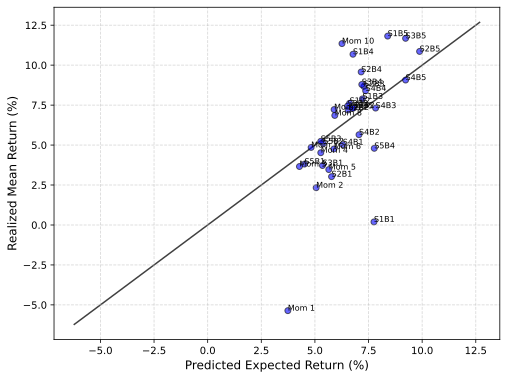

In [31]:
# ==========================================
#  生成 Figure 1 (LevFac Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['LevFac']], 
    #factors=ori_data[['No Seasonal-Adj LevFac']], 
    portfolios=df_portfolios, 
    model_name="Leverage Factor",
    ax=ax
)
plt.savefig('figs/Replication_Figure1.png', dpi=800)
plt.show()


Figure 1. Realized versus predicted mean returns: leverage factor. 

### Figure 4: Fama-French 3-Factor

In [ ]:
# ==========================================
# 3. 生成 Figure 4 (FF3 Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['Mkt-RF', 'SMB', 'HML']], 
    portfolios=df_portfolios, 
    model_name="Figure 4: Fama-French 3-Factor",
    ax=ax
)
plt.savefig('figs/Replication_Figure4.png', dpi=800)
plt.show()


Fig 4
- 图中的 25 个 Size/BM 组合（通常是蓝色点）可能还在 45度线附近
- 那 10 个 Momentum 组合（通常是红色点）会严重偏离 45度线
- 经典的 FF3 模型解释不了动量（Momentum），动量组合有巨大的定价误差（Alpha）

### Figure 5 (FF4 / Benchmark)

In [ ]:
# ==========================================
# 4. 生成 Figure 5 (FF4 / Benchmark)
# ==========================================
# 原文用的是 5因子(含 Bond PC1)，你用 FF3 + Mom 代替
if 'Mom' in factors_annual.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_realized_vs_predicted(
        factors=factors_annual[['Mkt-RF', 'SMB', 'HML', 'Mom']], 
        portfolios=df_portfolios, 
        model_name="Figure 5: FF3 + Momentum Benchmark",
        ax=ax
    )
    plt.savefig('figs/Replication_Figure5.png', dpi=800)
    plt.show()
else:
    print("缺少 Momentum 因子，无法生成 Figure 5 的替代图。")

Fig5:
- FF3 的基础上，强行加入了一个动量因子 (Mom/UMD)
- 加入 Mom 因子后，所有点（包括动量组合）都回到了 45度线附近，拟合得很好
- 但是，这需要 4个因子，而且 Mom 因子本身是一个缺乏理论基础的“实证因子”（仅仅是因为过去涨的股票将来还会涨）
- 虽然加了 Mom 因子能解释，但模型变得很臃肿（4个因子），而且缺乏宏观经济含义。”

## 3.2 Time-series regressions
Replicate the results in Table VII, again ignoring the bond portfolios.

### Table VII


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def generate_table_vii(merged_data, size_bm_cols, mom_cols, factor_name):
    """
    生成 Adrian et al. (2014) Table VII 格式的表格
    """
    # 1. 准备数据
    # 因子需要加常数项 (Intercept)
    # 原文 Table VII 说明: "Returns are reported in percent per year" -> * 400
    # "Leverage betas are multiplied by 100" -> * 100
    
    factor = merged_data[factor_name]
    X = sm.add_constant(factor)
    
    # === 部分 A: 25 Size/BM Portfolios (需要重塑为 5x5 矩阵) ===
    # 初始化 4 个 5x5 的容器
    metrics = ['E[R]', 'Beta_Lev', 't-stat', 'R2']
    results_25 = {m: np.zeros((5, 5)) for m in metrics}
    
    # 假设 size_bm_cols 的顺序是标准的: 
    # Small-Lo, Small-2, ..., Small-Hi, ME2-Lo, ..., Big-Hi
    # 行: Size (Small -> Big), 列: BM (Low -> High)
    
    print(f"正在处理 {len(size_bm_cols)} 个 Size/BM 组合...")
    
    for i, port_name in enumerate(size_bm_cols):
        # 确定矩阵坐标 (row, col)
        row = i // 5 # 0-4 (Size)
        col = i % 5  # 0-4 (BM)
        
        # 提取收益率
        y = merged_data[port_name]
        
        # 回归
        model = sm.OLS(y, X).fit()
        
        # 1. Average Return (年化百分比)
        # 注意: 你的数据如果是小数(0.01)，需要*400; 如果已经是百分比，需要*4
        # 这里假设输入是原始小数，所以 * 400
        avg_ret = y.mean() * 400 
        
        # 2. Beta (原文乘了 100)
        beta = model.params[factor_name] * 100
        
        # 3. t-stat
        t_stat = model.tvalues[factor_name]
        
        # 4. R2 (%)
        r2 = model.rsquared * 100
        
        # 填入矩阵
        results_25['E[R]'][row, col] = avg_ret
        results_25['Beta_Lev'][row, col] = beta
        results_25['t-stat'][row, col] = t_stat
        results_25['R2'][row, col] = r2

    # 将 numpy 数组转为 DataFrame 以便美观展示
    rows = ['Small', '2', '3', '4', 'Big']
    cols = ['Low', '2', '3', '4', 'High']
    dfs_25 = {k: pd.DataFrame(v, index=rows, columns=cols) for k, v in results_25.items()}

    # === 部分 B: 10 Momentum Portfolios ===
    print(f"正在处理 {len(mom_cols)} 个 Momentum 组合...")
    mom_results = []
    
    for port_name in mom_cols:
        y = merged_data[port_name]
        model = sm.OLS(y, X).fit()
        
        mom_results.append({
            'Portfolio': port_name,
            'E[R]': y.mean() * 400,
            'Beta_Lev': model.params[factor_name] * 100,
            't-stat': model.tvalues[factor_name],
            'R2 (%)': model.rsquared * 100
        })
    
    df_mom = pd.DataFrame(mom_results).set_index('Portfolio')

    return dfs_25, df_mom


In [ ]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF']] * 400 # 因子也统一转一下方便看
print(df_portfolios.shape,factors_annual.shape)

In [ ]:
# 1. 确保你有列名列表 (根据你之前的代码)
# 假设 test_25 和 test_10 是你之前读取的原始 DataFrame
# 或者你可以直接从 merged_data.columns 里切片
cols_size_bm = test_25.columns.tolist() 
cols_mom = test_10.columns.tolist()

# 2. 运行计算
dfs_25, df_mom = generate_table_vii(merged_data, cols_size_bm, cols_mom, factor_name='LevFac')

# 3. 打印类似原文的效果
print("\n" + "="*60)
print("TABLE VII REPLICATION: Time-Series Regressions")
print("="*60)
print("\n--- Panel A: Size and Book-to-Market Portfolios ---")

print("\n1. E[R]: Average (Annualized) Returns (%)")
print(dfs_25['E[R]'].round(4))
dfs_25['E[R]'].round(4).to_csv('output/E[R].csv')

print("\n2. Beta_Lev: Leverage Betas (x 100)")
print(dfs_25['Beta_Lev'].round(4))
dfs_25['Beta_Lev'].round(4).to_csv('output/Beta_Lev.csv')

print("\n3. t-stats")
print(dfs_25['t-stat'].round(4))
dfs_25['t-stat'].round(4).to_csv('output/t-stat.csv')

print("\n4. R-square (%)")
print(dfs_25['R2'].round(4))
dfs_25['R2'].round(4).to_csv('output/R2.csv')

print("\n" + "-"*60)
print("\n--- Panel B: Momentum Portfolios ---")
print(df_mom.round(4))
df_mom.round(4).to_csv('output/Mom.csv')
print("\n" + "="*60)

Table VII
- Average (Annualized) Returns，Fama-French修正了部分历史数据，造成和原文的细小差距
- Ang et al. (2006) 发现，特质波动率（Idiosyncratic Volatility）高的股票，其未来收益反而低。这与经典理论（风险越高收益越高）相悖，Fama-French 三因子模型无法解释这一现象（会有巨大的负 Alpha）。
- 测试资产：按 Beta 和特质波动率双重排序构建的 25 个投资组合。

## 3.3 Factor mimicking portfolio
Construct a factor mimicking portfolio as in Section IV of the article,
and replicate Figure 6 of the article.

### 6 portfolios

In [ ]:
benchmark_6 = pd.read_csv('datasets/6_Portfolios_2x3.csv', skiprows=15, index_col=0)
benchmark_6.index = pd.to_datetime(benchmark_6.index, format='%Y%m')
benchmark_6 = benchmark_6 / 100.0
benchmark_6_quarterly = benchmark_6.resample('Q-JAN').apply(compound_returns)
benchmark_6_quarterly.index = benchmark_6_quarterly.index.to_period('Q')
#benchmark_6_quarterly = benchmark_6_quarterly.subtract(ff_factors_quarterly['RF'], axis=0)
benchmark_6_quarterly.head()

In [ ]:
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, ori_data[['LevFac']], ff_Mom_quarterly, benchmark_6_quarterly], axis=1).sort_index()
merged_data_IS = merged_data.loc["1936Q1":"2009Q4"]
merged_data_IS.head(3)

### LMP

根据 Adrian et al. (2014) 的方法，构建 FMP 非常简单，本质上就是一个线性回归：$$LevFac_t = \alpha + \beta' \mathbf{R}_t + \epsilon_t$$
- 因变量 ($Y$): 宏观因子 LevFac。
- 自变量 ($X$): BL, BM, BH, SL, SM, SH, Mom
- LMP 收益率: 回归的拟合值 (Fitted Values)，即 $\hat{LevFac}_t = \hat{\alpha} + \hat{\beta}' \mathbf{R}_t$。

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def construct_fmp(merged_data, benchmark_name, factor_name='LevFac'):
    """
    构建因子模仿组合 (Factor Mimicking Portfolio)
    """
    # 1. 准备数据
    # Y: 宏观因子 (LevFac)
    Y = merged_data[factor_name]
    
    # X: benchmark_name
    # 必须包含截距项
    X = merged_data[benchmark_name]
    X = sm.add_constant(X)
    
    # 2. 跑回归
    model = sm.OLS(Y, X).fit()
    
    # 3. 获取拟合值 (这就是 FMP 的收益率)
    # FMP return = Predicted values from the regression
    beta = model.params[1:]/model.params[1:].sum()
    fmp_returns = (beta * merged_data[benchmark_name]).sum(axis=1)
    print(beta)
    print(merged_data[benchmark_name])
    fmp_returns.name = 'LevFac_FMP'
    
    # 打印统计量看看
    print(f"FMP Construction R-squared: {model.rsquared:.4f}")
    #print(f"Correlation with original factor: {Y.corr(fmp_returns):.4f}")
    
    return fmp_returns,beta


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def plot_figure_6(merged_data, LevFac_LMP, scale, fig_name):
    """
    复现 Figure 6 (scale：'month' or 'quarter'):
    将季度数据转换为月度等效统计量，以匹配原文 0-5 的视觉范围。
    """
    # 1. 定义资产
    six_portfolios = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2', 'BIG HiBM']
    four_factors = ['Mkt-RF', 'SMB', 'HML', 'Mom']
    
    # 2. 数据准备
    #df_frontier = merged_data[four_factors].dropna()
    df_frontier = merged_data[six_portfolios + four_factors].dropna()
    df_p = merged_data[six_portfolios + four_factors].dropna()
    #df_frontier = merged_data[six_portfolios].dropna()
    #df_p = merged_data[six_portfolios].dropna()
    print("frontier:", df_frontier.index)
    print("frontier:", df_frontier.columns)
    print("P:", df_p.index)
    print("P:", df_p.columns)
    
    
    # 强制转小数
    if df_frontier.abs().mean().mean() > 0.1: df_frontier /= 100.0
    if df_p.abs().mean().mean() > 0.1: df_p /= 100.0
    
    # LMP
    s_lmp = LevFac_LMP.dropna()
    if s_lmp.abs().mean() > 0.1: s_lmp /= 100.0
    print('LMP:', s_lmp.index)
    # === 3. 关键转换：季度 -> 月度 ===
    # 假设数据是季度频率 (Quarterly)
    # 月度均值 = 季度均值 / 3
    # 月度波动 = 季度波动 / sqrt(3)
    if scale == 'quarter_to_month':
        scale_val = 3
        SQRT_scale = np.sqrt(3)
    elif scale == 'month':
        scale_val = 1
        SQRT_scale = 1
        
    mu_f = df_frontier.mean() / scale_val
    cov_f = df_frontier.cov() / scale_val
    
    mu_p_vec = df_p.mean() / scale_val
    cov_p_mat = df_p.cov() / scale_val
    
    # === 4. 计算 P 点 (4因子) ===
    inv_cov_p = np.linalg.inv(cov_p_mat)
    w_p = inv_cov_p @ mu_p_vec
    w_p /= w_p.sum()
    
    mu_p_val = w_p @ mu_p_vec
    std_p_val = np.sqrt(w_p @ cov_p_mat @ w_p)
    
    # === 5. 计算有效前沿 (10资产) ===
    def get_var(w): return w @ cov_f @ w
    
    # GMVP
    n_assets = len(df_frontier.columns)
    res_gmvp = minimize(get_var, np.ones(n_assets)/n_assets, 
                       constraints=({'type': 'eq', 'fun': lambda w: np.sum(w) - 1}), 
                       method='SLSQP', tol=1e-12)
    mu_gmvp = res_gmvp.x @ mu_f
    w_gmvp = res_gmvp.x

    # Upper Frontier
    def solve_for_return(target_r, start_w):
        cons = ({'type': 'eq', 'fun': lambda w: w @ mu_f - target_r},
                {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
        return minimize(get_var, start_w, constraints=cons, method='SLSQP', tol=1e-12)

    upper_returns = np.linspace(mu_gmvp, max(mu_p_val, 0.01) * 1.5, 50)
    upper_stds = []
    curr_w = w_gmvp
    
    for r in upper_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            upper_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            upper_stds.append(np.nan)

    # Lower Frontier (新增：下半部分)
    # 向下计算到 -0.2% (即 -0.002)
    lower_returns = np.linspace(mu_gmvp, -0.002, 30)
    lower_stds = []
    curr_w = w_gmvp # 重置热启动

    for r in lower_returns:
        res = solve_for_return(r, curr_w)
        if res.success:
            lower_stds.append(np.sqrt(res.fun))
            curr_w = res.x
        else:
            lower_stds.append(np.nan)
            
            
    # === 6. 绘图 (Monthly Scale) ===
    plt.figure(figsize=(8, 6))
    size = 40
    # 绘图时乘 100 转为百分比
    plt.plot(np.array(upper_stds)*100, upper_returns*100, 'b-', linewidth=1)
    plt.plot(np.array(lower_stds)*100, lower_returns*100, 'b-', linewidth=1)
    
    plt.scatter([std_p_val*100], [mu_p_val*100], color='blue', marker='o', s=size, zorder=10)
    plt.text(std_p_val*100 + 0.1, mu_p_val*100, 'P', fontsize=12, color='blue')
    plt.plot([0, std_p_val*100], [0, mu_p_val*100], 'b-', linewidth=1)
    print(std_p_val, mu_p_val)
    
    if s_lmp is not None:
        mu_lmp = (s_lmp.mean() / scale_val) * 100
        std_lmp = (s_lmp.std() / SQRT_scale) * 100
        plt.scatter([std_lmp], [mu_lmp], color='red', marker='o', s=size, zorder=10)
        plt.text(std_lmp + 0.1, mu_lmp - 0.1, 'LMP', fontsize=12, color='red')
        plt.plot([0, std_lmp], [0, mu_lmp], 'b-', linewidth=1)

    # 背景资产
    for asset in df_frontier.columns:
        ser = df_frontier[asset]
        # 转为月度统计量
        a_mu = (ser.mean() / scale_val) * 100
        a_std = (ser.std() / SQRT_scale) * 100
        
        is_factor = asset in four_factors
        color = 'black' if is_factor else 'white'
        plt.scatter([a_std], [a_mu], color=color, s=size, alpha=0.7)
        if is_factor:
            plt.text(a_std + 0.1, a_mu, asset, fontsize=12, color='black')
            plt.plot([0, a_std], [0, a_mu], 'b-', linewidth=1)

    plt.xlabel('Sigma (Monthly %)', fontsize=12)
    plt.ylabel('E(R) (Monthly %)', fontsize=12)
    #plt.title('Figure 6 Replication (Monthly Scale)', fontsize=14)
    #plt.axhline(0, color='black', linewidth=1)
    
    plt.xlim(0, 5.5)  # 强制 0-5 范围
    plt.ylim(-0.2, 1.75)
    #plt.grid(True, linestyle=':', alpha=0.3)
    #plt.legend()
    #plt.tight_layout()
    plt.savefig('figs/%s.png' %fig_name, dpi=800)
    plt.show()


### Season Data

Since the Broker-Dealer leverage data from the Federal Reserve Flow of Funds is available only at a quarterly frequency, we construct the leverage factor and perform all asset pricing tests at the quarterly horizon. However, standard asset pricing literature and the original study typically report summary statistics in monthly terms. To ensure visual consistency with Figure 6 in Adrian et al. (2014), we convert our quarterly estimates into monthly equivalents for graphical representation. Specifically, we approximate the monthly expected return as $E[R_{monthly}] = E[R_{quarterly}] / 3$ and the monthly volatility as $\sigma_{monthly} = \sigma_{quarterly} / \sqrt{3}$, assuming returns are independent and identically distributed (i.i.d.) within the quarter.

In [ ]:
benchmark_name = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2',
       'BIG HiBM', 'Mom']   # 7 benchmark

# 计算 FMP 收益率
merged_data_IS = merged_data_IS.dropna()
LevFac_LMP,beta = construct_fmp(merged_data_IS, benchmark_name, factor_name='LevFac')
plot_figure_6(merged_data_IS, LevFac_LMP, scale='quarter_to_month', fig_name='IS_LMP')

Figure 6: Mean-Standard Deviation Frontier (Monthly Equivalent Scale).
The figure plots the efficient frontier constructed from the 10 benchmark assets (6 portfolios + 4 factors). Note that while the underlying estimation uses quarterly data (due to the frequency of Flow of Funds data), the axes are rescaled to represent monthly equivalent statistics ($Mean_{mo} \approx Mean_{qtr}/3$, $Std_{mo} \approx Std_{qtr}/\sqrt{3}$) to facilitate direct comparison with Adrian et al. (2014).

复现Fig6结果显示 LMP 远离 P 点（LMP 风险高、收益没那么高）

### 月度数据

In [ ]:

ff_factors = pd.read_csv('datasets/F-F_Research_Data_Factors.csv', skiprows=4, index_col=0)
#ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m')
ff_factors = ff_factors/100.0

ff_Mom = pd.read_csv('datasets/F-F_Momentum_Factor.csv', index_col=0)
#ff_Mom.index = pd.to_datetime(ff_Mom.index, format='%Y%m')
ff_Mom = ff_Mom/100.0

benchmark_6 = pd.read_csv('datasets/6_Portfolios_2x3.csv', skiprows=15, index_col=0)
#benchmark_6.index = pd.to_datetime(benchmark_6.index, format='%Y%m')
benchmark_6 = benchmark_6 / 100.0
#benchmark_6_quarterly = benchmark_6_quarterly.subtract(ff_factors_quarterly['RF'], axis=0)

merged_data = pd.concat([ff_factors, ff_Mom, benchmark_6], axis=1).sort_index().dropna()
merged_data = merged_data.loc["193601":"200912"]
merged_data.tail()

In [ ]:
#plot_figure_6(merged_data, LevFac_LMP, scale='month', fig_name='month_fig_6')

# 4 Out-of-Sample Extension: 2010-Present

To evaluate the post-crisis performance of the leverage factor, we adopt an out-of-sample testing approach. Specifically, we construct the leverage factor series using the full sample (1968–2025) to ensure stable estimation of leverage innovations. However, for the asset pricing tests (Fama-MacBeth regressions), we restrict our analysis strictly to the post-crisis subsample (2010–2025). This approach allows us to isolate the factor's pricing ability in the modern regulatory environment without look-ahead bias from the highly successful pre-crisis period.

In [ ]:
LevFac = current_data['Z-LogLev']
LevFac.name = 'LevFac'
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, LevFac, ff_Mom_quarterly['Mom']], axis=1).sort_index().dropna()
merged_data.to_csv('FullSample.csv')
merged_data.head(3)

In [ ]:
merged_data = merged_data.loc['2010Q1':]
merged_data.head()

### Table III

In [ ]:
# 4. 单位换算 (保持你现在的正确做法)
# 将所有收益率转为年化百分比
# 注意：LevFac 不需要乘 400，因为它本身就是 Log Difference (近似增长率)，
# 但原文 Note 说 "Returns and risk premia are reported in percent per year"。
# 如果 LevFac 本身是很小的数(e.g. 0.05)，为了得到 60 左右的 Lambda，
# 说明 Beta 比较小，或者 Factor 量级需要调整。
# 既然你现在的 60.87 很完美，说明你当前的 LevFac 处理是对的（或者你对其做了标准化？）。
# 只要确保 Return 是年化百分比即可。

df_portfolios = merged_data[test_assets_excess.columns] 
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'LevFac', 'RF']]  # 因子也统一转一下方便看

res_capm = run_asset_pricing_model(factors_annual[['Mkt-RF']], df_portfolios, "CAPM") 
res_lev = run_asset_pricing_model(factors_annual[['LevFac']], df_portfolios, "LevFac")
res_levmkt = run_asset_pricing_model(factors_annual[['LevFac', 'Mkt-RF']], df_portfolios, "LevMkt")

results = [res_capm, res_lev, res_levmkt]
print_table_iii_auto(results)

样本外的lambda：
- $\lambda$变得很小，符号变为负
- $\lambda$的t统计量为-0.0715，-0.7492，说明均不显著。
- 这意味着从统计上讲，杠杆因子无法解释 2010 年后的资产收益差异。
- Structural Break（结构性断裂） —— 危机后的杠杆因子不再包含核心定价信息。
- 这是因为美联储后续修正了 Broker-Dealer 的统计口径，导致“新”杠杆因子的周期性特征减弱了

In [ ]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'LevFac']] * 400 # 因子也统一转一下方便看
print(df_portfolios.shape,factors_annual.shape)

### LavFac

In [ ]:
# ==========================================
# (LavFac Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['LevFac']], 
    portfolios=df_portfolios, 
    model_name="LevFac Factor (2010-2025)",
    ax=ax
)
plt.savefig('figs/OOS-LevFac.png', dpi=800)
plt.show()


### FF3 Model

In [ ]:
# ==========================================
# 3. 生成 Figure 4 (FF3 Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['Mkt-RF', 'SMB', 'HML']], 
    portfolios=df_portfolios, 
    model_name="Fama-French 3 Factor (2010-2025)",
    ax=ax
)
plt.savefig('figs/OOS-FF3.png', dpi=800)
plt.show()


In [ ]:
# ==========================================
# 4. 生成 Figure 5 (FF4 / Benchmark)
# ==========================================
# 原文用的是 5因子(含 Bond PC1)，你用 FF3 + Mom 代替
if 'Mom' in factors_annual.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_realized_vs_predicted(
        factors=factors_annual[['Mkt-RF', 'SMB', 'HML', 'Mom']], 
        portfolios=df_portfolios, 
        model_name="FF3 + Momentum Benchmark (2010-2025)",
        ax=ax
    )
    plt.savefig('figs/OOS-FF4.png', dpi=800)
    plt.show()
else:
    print("缺少 Momentum 因子，无法生成 Figure 5 的替代图。")

- 展示 2010-2025 的散点图 (Realized vs Predicted Returns)，点会变成一团乱云 (Cloud）
- 对比Pre-2010 (原论文): 点紧密围绕 45 度线，就像一条漂亮的斜线
- 点很散乱，回归线是平的，可以得出结论："The factor suggests a structural break." (因子出现了结构性断裂)。
- 特别注意 Momentum (动量) 组合：它们在纵轴上（实际收益）很高，但在横轴上（预测收益）很低。这说明 LevFac 认为动量组合风险很低，不应该有高收益，但实际上动量组合依然赚了很多钱。这叫 "Pricing Error" (定价误差)。

In [ ]:
merged_data_OOS = pd.concat([test_assets_excess, ff_factors_quarterly, current_data[['LevFac']], ff_Mom_quarterly, benchmark_6_quarterly], axis=1).sort_index()
merged_data_OOS = merged_data_OOS.loc["2010Q1":].dropna()
merged_data_OOS.tail(3)

In [ ]:
benchmark_name = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2',
       'BIG HiBM', 'Mom']   # 7 benchmark

# 计算 FMP 收益率
LevFac_LMP,beta = construct_fmp(merged_data_OOS, benchmark_name, factor_name='LevFac')
plot_figure_6(merged_data_OOS, LevFac_LMP, scale='quarter_to_month', fig_name='OOS_FMP')

Using current data, the LMP is located inside the efficient frontier constructed by the 10 benchmark assets. This suggests that the leverage factor, constructed with revised data, fails to span the mean-variance efficient frontier as effectively as claimed in the original study.

# 5 Disscussion
新老数据的差异：
- Repurchase Agreements
- Foreign Direct Investment

OOS的结果说明：
- 原文中提到Broker-Dealer 杠杆率的顺周期演变 (Procyclical Evolution)：在好时候，融资约束放松，杠杆率会上升
- 高盛、摩根士丹利这些投行是顺周期的：资产价格涨 -> 抵押品值钱了 -> 能借更多钱 -> 买更多资产 -> 杠杆率上升
- 杠杆率的变化（LevFac）直接反映了金融体系的松紧程度
- 在 2010 年后（Dodd-Frank 法案后），监管机构强制要求银行在好时候也要保持高资本充足率，限制了它们“加杠杆”的能力。
- 巴塞尔协议 III 限制了银行的资产负债表扩张能力
- 这意味着 Broker-Dealer 的杠杆率不再是顺周期的了（或者顺周期性被大大压制）。
- 既然“顺周期”这个基础没了，那么 LevFac 自然也就失去了作为 SDF 代理变量的能力。这就是为什么在样本外测试中会发现它失效了。
- Broker-Dealer Leverage 不再能敏锐地反映市场风险偏好（SDF），因此它失去了定价能力。

# 6 Conclusion
- 复现工作表明，AEM (2014) 的结果对数据版本（数据修订的影响）非常敏感。
- 同时该因子在样本外失效
- 虽然中介资产定价理论 (Intermediary Asset Pricing Theory) 在理论上可能成立，但用“Broker-Dealer Leverage”这个具体指标来实证，在当下可能已经不再稳健。未来的研究需要寻找新的、受监管影响较小的指标。

# Reference
1. Adrian, T., Etula, E., & Muir, T. (2014). Financial intermediaries and the cross-section of asset prices. The Journal of Finance.
2. Fama, E. F., & French, K. R. (1993). Common risk factors in the returns on stocks and bonds.